<a href="https://colab.research.google.com/github/ocy0581/link_Jolssul/blob/master/MediaPipeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 90kB/s 


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


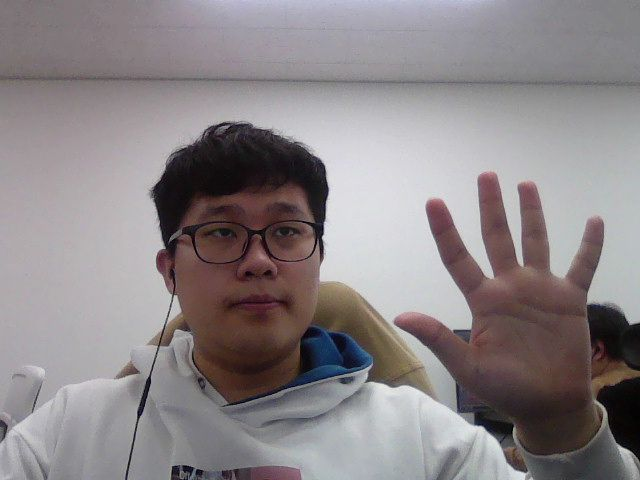

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import mediapipe as mp
mp_holistic = mp.solutions.holistic

help(mp_holistic.Holistic)

# Initialize MediaPipe Holistic.
holistic = mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5)

Help on class Holistic in module mediapipe.python.solutions.holistic:

class Holistic(mediapipe.python.solution_base.SolutionBase)
 |  Holistic(static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Holistic.
 |  
 |  MediaPipe Holistic processes an RGB image and returns pose landmarks, left and
 |  right hand landmarks, and face mesh landmarks on the most prominent person
 |  detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/holistic#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      Holistic
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, upper_body_only=False, smooth_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Holistic object.
 |      
 |      Args:
 |        static_image

In [ ]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

photo.jpg


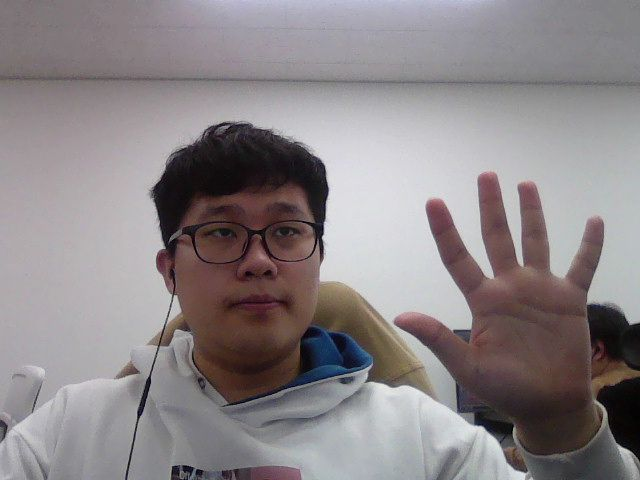

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = cv2.imread(filename)
images = {filename:images}
# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

In [ ]:
images.items()

dict_items([('photo.jpg', array([[[118, 115, 124],
        [117, 114, 123],
        [116, 113, 122],
        ...,
        [130, 128, 128],
        [131, 129, 129],
        [133, 131, 131]],

       [[119, 116, 125],
        [117, 114, 123],
        [117, 114, 123],
        ...,
        [135, 133, 133],
        [135, 133, 133],
        [134, 132, 132]],

       [[120, 117, 126],
        [119, 116, 125],
        [118, 115, 124],
        ...,
        [134, 132, 132],
        [132, 130, 130],
        [130, 128, 128]],

       ...,

       [[182, 176, 177],
        [181, 175, 176],
        [187, 181, 182],
        ...,
        [146, 146, 146],
        [139, 139, 139],
        [130, 130, 130]],

       [[186, 180, 181],
        [184, 178, 179],
        [191, 185, 186],
        ...,
        [141, 141, 141],
        [135, 135, 135],
        [138, 138, 138]],

       [[186, 180, 181],
        [183, 177, 178],
        [189, 183, 184],
        ...,
        [139, 139, 139],
        [136, 136, 136]

Nose coordinates: (261.6727638244629, 262.9948139190674)
Pose landmarks of photo.jpg:


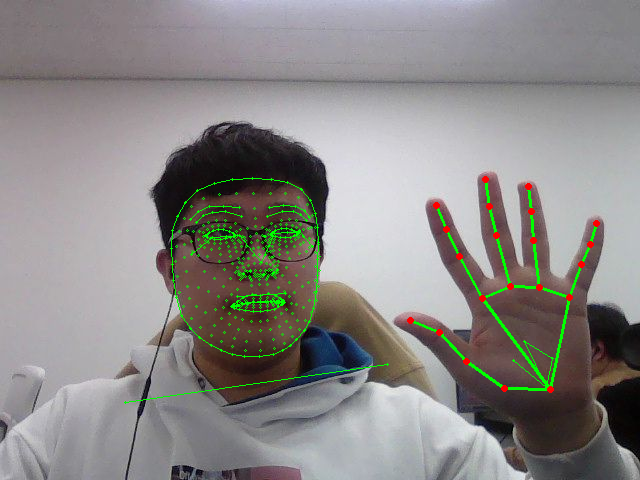

In [ ]:
for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Print nose coordinates.
  image_hight, image_width, _ = image.shape
  if results.pose_landmarks:
    print(
      f'Nose coordinates: ('
      f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
    )
  # Draw pose landmarks.
  print(f'Pose landmarks of {name}:')
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  mp_drawing.draw_landmarks(
      image=annotated_image, 
      landmark_list=results.face_landmarks, 
      connections=mp_holistic.FACE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  mp_drawing.draw_landmarks(
      image=annotated_image, 
      landmark_list=results.pose_landmarks, 
      connections=mp_holistic.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  cv2_imshow(annotated_image)

In [ ]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [ ]:
results.left_hand_landmarks.landmark[0]

x: 0.8594685792922974
y: 0.8109045028686523
z: -4.594505298882723e-05

In [ ]:
results.left_hand_landmarks.landmark[0].x

0.8594685792922974

In [ ]:
!pip install protobuf3-to-dict

In [ ]:
from protobuf_to_dict import protobuf_to_dict

In [ ]:
keypoints = protobuf_to_dict(results.left_hand_landmarks)

In [ ]:
keypoints

{'landmark': [{'x': 0.8594685792922974,
   'y': 0.8109045028686523,
   'z': -4.594505298882723e-05},
  {'x': 0.7883540987968445,
   'y': 0.8092362284660339,
   'z': -0.047069888561964035},
  {'x': 0.7283316254615784,
   'y': 0.7528314590454102,
   'z': -0.06653168797492981},
  {'x': 0.6860644221305847,
   'y': 0.6937295198440552,
   'z': -0.08730891346931458},
  {'x': 0.6413564085960388, 'y': 0.666947066783905, 'z': -0.11111142486333847},
  {'x': 0.7533775568008423,
   'y': 0.6219727993011475,
   'z': -0.03943644464015961},
  {'x': 0.7173303365707397,
   'y': 0.5336779952049255,
   'z': -0.06640434265136719},
  {'x': 0.6977198719978333,
   'y': 0.47866806387901306,
   'z': -0.08745089918375015},
  {'x': 0.681371808052063,
   'y': 0.42910969257354736,
   'z': -0.10197167843580246},
  {'x': 0.7977648973464966,
   'y': 0.5976414084434509,
   'z': -0.03802400082349777},
  {'x': 0.7751629948616028,
   'y': 0.49117669463157654,
   'z': -0.05228681489825249},
  {'x': 0.7652423977851868, 'y': 

In [ ]:
type(keypoints)

dict

In [ ]:
type(keypoints['landmark'][0])

dict

In [ ]:
keypoints['landmark'][0]

{'x': 0.8594685792922974, 'y': 0.8109045028686523, 'z': -4.594505298882723e-05}

In [ ]:
import tensorflow as tf

In [ ]:
type(keypoints['landmark'])

list

In [ ]:
for i in keypoints['landmark']:
  print(i)

{'x': 0.8594685792922974, 'y': 0.8109045028686523, 'z': -4.594505298882723e-05}
{'x': 0.7883540987968445, 'y': 0.8092362284660339, 'z': -0.047069888561964035}
{'x': 0.7283316254615784, 'y': 0.7528314590454102, 'z': -0.06653168797492981}
{'x': 0.6860644221305847, 'y': 0.6937295198440552, 'z': -0.08730891346931458}
{'x': 0.6413564085960388, 'y': 0.666947066783905, 'z': -0.11111142486333847}
{'x': 0.7533775568008423, 'y': 0.6219727993011475, 'z': -0.03943644464015961}
{'x': 0.7173303365707397, 'y': 0.5336779952049255, 'z': -0.06640434265136719}
{'x': 0.6977198719978333, 'y': 0.47866806387901306, 'z': -0.08745089918375015}
{'x': 0.681371808052063, 'y': 0.42910969257354736, 'z': -0.10197167843580246}
{'x': 0.7977648973464966, 'y': 0.5976414084434509, 'z': -0.03802400082349777}
{'x': 0.7751629948616028, 'y': 0.49117669463157654, 'z': -0.05228681489825249}
{'x': 0.7652423977851868, 'y': 0.4297544062137604, 'z': -0.080730140209198}
{'x': 0.7585073709487915, 'y': 0.3747018575668335, 'z': -0.101